### Importing Required Libraries

In [78]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as ss
ss.set_theme()
from sklearn.metrics import precision_score,recall_score

### Importing the dataset

In [2]:
credit_df = pd.read_csv("https://raw.githubusercontent.com/subhajit2001/Credit_Risk_Analyzer/main/credit_data.csv")
credit_df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


### Exploratory data analysis of the Dataset

In [ ]:
credit_df.shape

(50636, 13)

In [ ]:
credit_df.columns

Index(['age', 'gender', 'education', 'occupation', 'organization_type',
       'seniority', 'annual_income', 'disposable_income', 'house_type',
       'vehicle_type', 'marital_status', 'no_card', 'default'],
      dtype='object')

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                50636 non-null  int64 
 1   gender             50636 non-null  object
 2   education          50636 non-null  object
 3   occupation         50636 non-null  object
 4   organization_type  50636 non-null  object
 5   seniority          50636 non-null  object
 6   annual_income      50636 non-null  int64 
 7   disposable_income  50636 non-null  int64 
 8   house_type         50636 non-null  object
 9   vehicle_type       50636 non-null  object
 10  marital_status     50636 non-null  object
 11  no_card            50636 non-null  int64 
 12  default            50636 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


In [ ]:
credit_df.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


### Value Counts of each category in the dataset

In [ ]:
arr = ['gender', 'education', 'occupation', 'organization_type',
       'seniority', 'house_type', 'vehicle_type', 'marital_status', 'no_card','default']
for x in arr:
  print(credit_df[x].value_counts())
  print("\n")  

Male      36187
Female    14449
Name: gender, dtype: int64


Graduate          24320
Post Graduate     14545
Under Graduate     6189
Other              5582
Name: education, dtype: int64


Salaried        29738
Business        10072
Professional     7942
Student          2884
Name: occupation, dtype: int64


None      35884
Tier 3     9165
Tier 2     4226
Tier 1     1361
Name: organization_type, dtype: int64


None           20898
Mid-level 1    15565
Junior          7934
Entry           6136
Mid-level 2       60
Senior            43
Name: seniority, dtype: int64


Rented              30411
Owned                9077
Family               7506
Company provided     3642
Name: house_type, dtype: int64


None            33301
Two Wheeler     15101
Four Wheeler     2234
Name: vehicle_type, dtype: int64


Married    29539
Single     18576
Other       2521
Name: marital_status, dtype: int64


0    29855
1    15747
2     5034
Name: no_card, dtype: int64


0    42614
1     8022
Name: default, dt

### Data Visualizations

#### Frequency distribution of each categorical attribute

        default
gender         
Female    14449
Male      36187


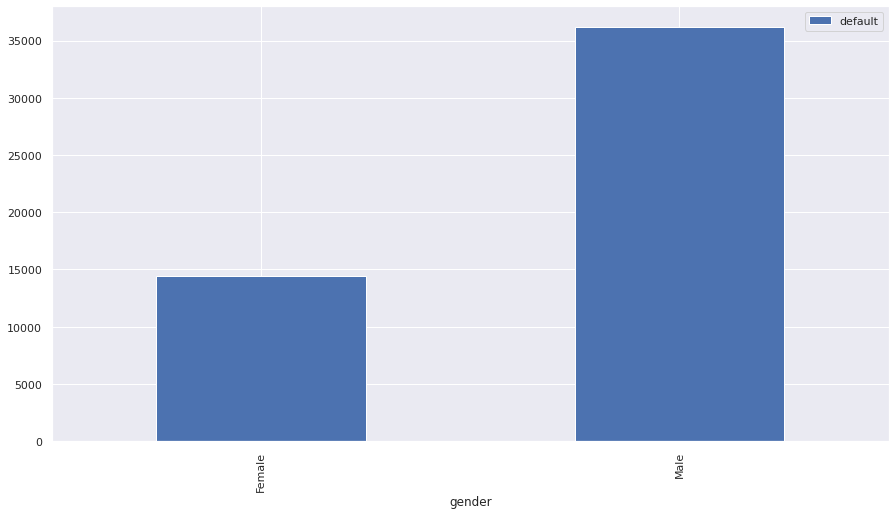

                default
education              
Graduate          24320
Other              5582
Post Graduate     14545
Under Graduate     6189


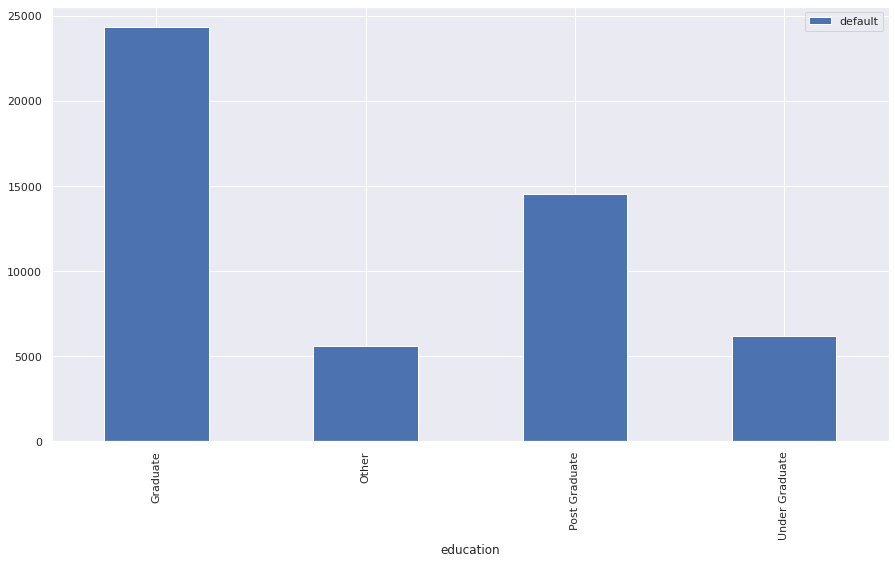

              default
occupation           
Business        10072
Professional     7942
Salaried        29738
Student          2884


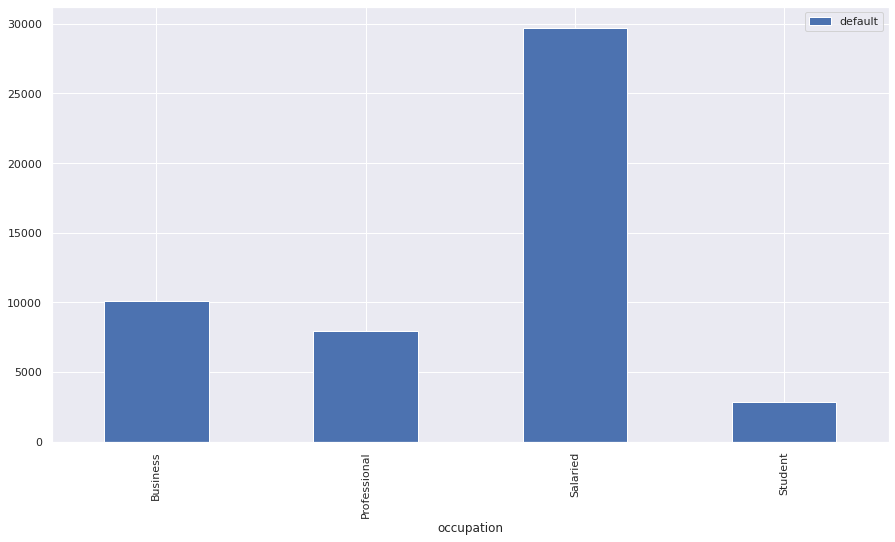

                   default
organization_type         
None                 35884
Tier 1                1361
Tier 2                4226
Tier 3                9165


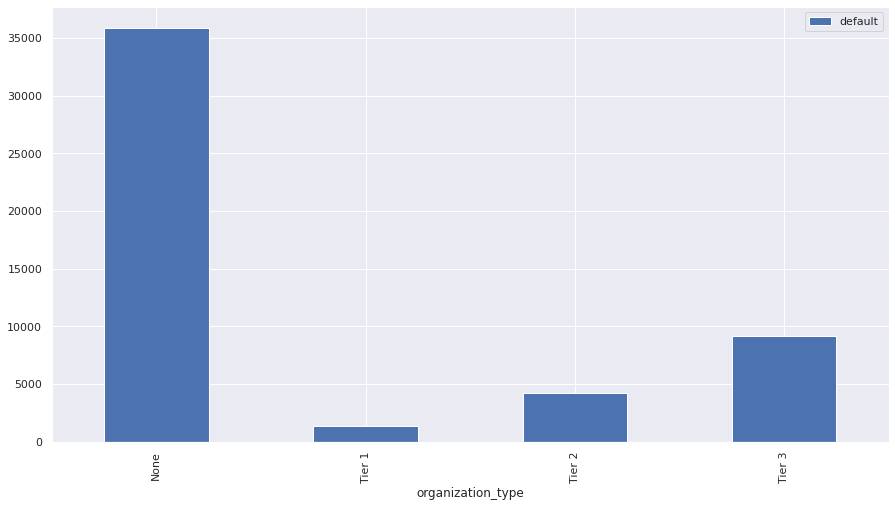

             default
seniority           
Entry           6136
Junior          7934
Mid-level 1    15565
Mid-level 2       60
None           20898
Senior            43


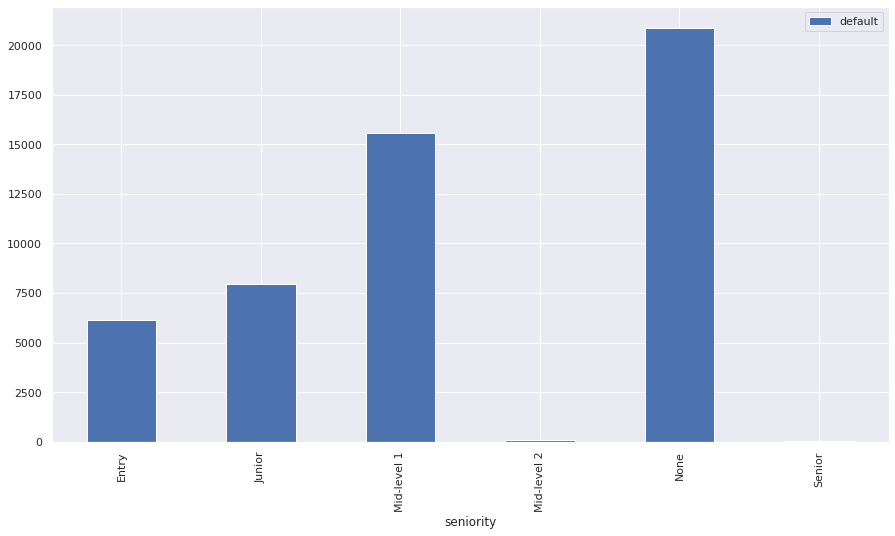

                  default
house_type               
Company provided     3642
Family               7506
Owned                9077
Rented              30411


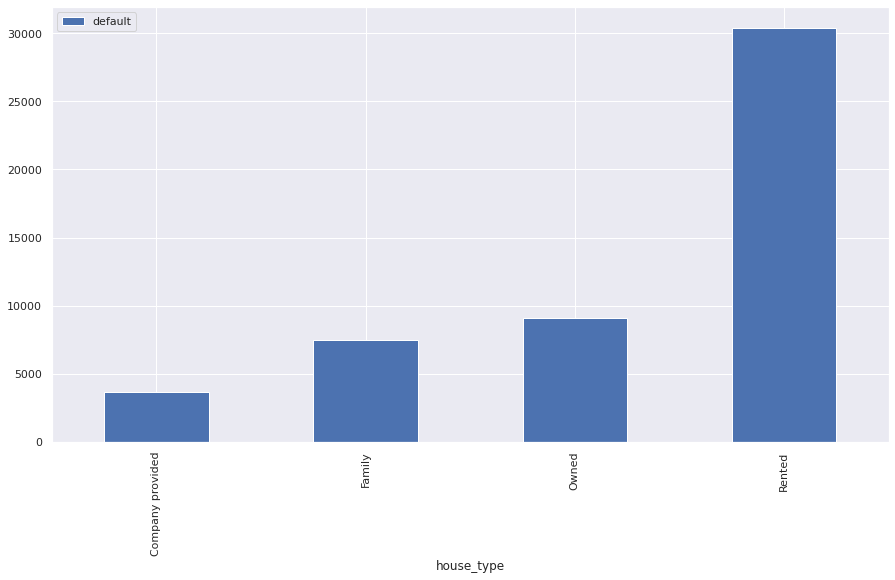

              default
vehicle_type         
Four Wheeler     2234
None            33301
Two Wheeler     15101


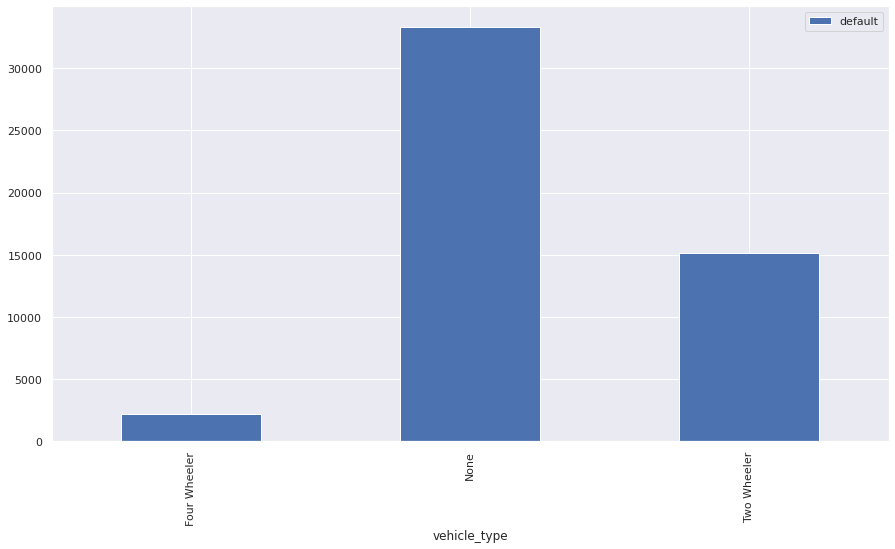

                default
marital_status         
Married           29539
Other              2521
Single            18576


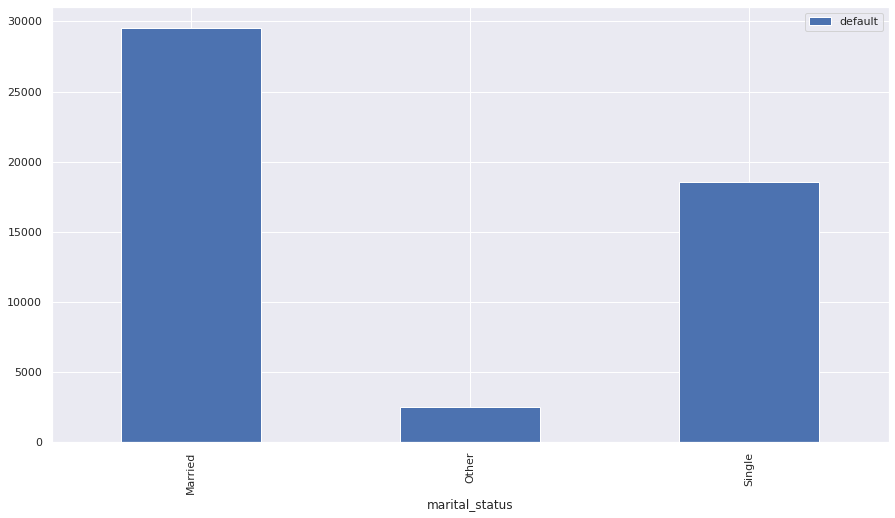

         default
no_card         
0          29855
1          15747
2           5034


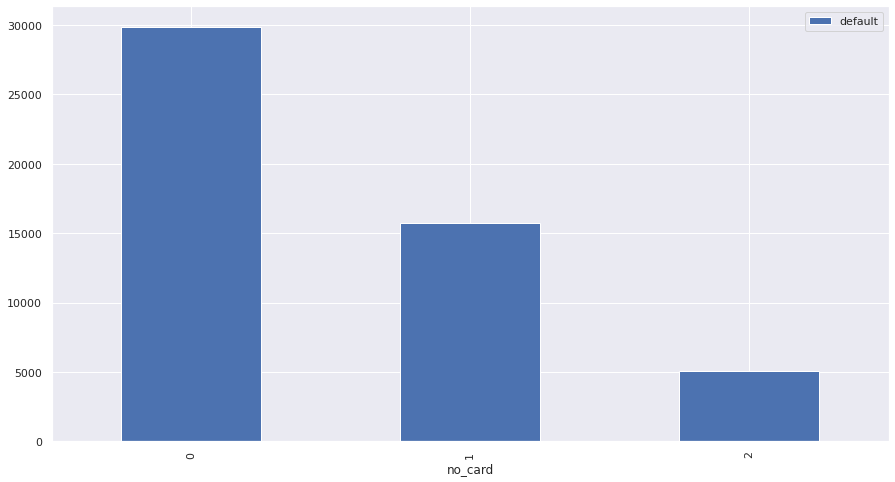

In [ ]:
arr = ['gender', 'education', 'occupation', 'organization_type',
       'seniority', 'house_type', 'vehicle_type', 'marital_status', 'no_card']
for x in arr:
  grouped = credit_df[['default',x]].groupby(x).count()
  print(grouped)
  grouped.plot(kind="bar",figsize=(15,8))
  plt.show()

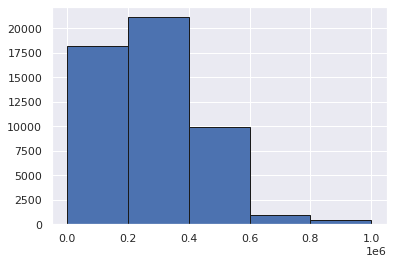

In [ ]:
bins= [0,200000,400000,600000,800000,1000000]
plt.hist(credit_df['annual_income'].values, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

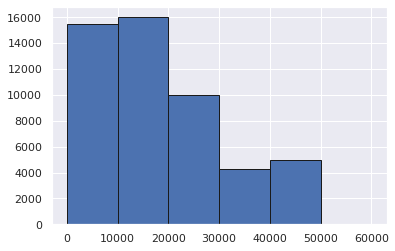

In [ ]:
bins= [0,10000,20000,30000,40000,50000,60000]
plt.hist(credit_df['disposable_income'].values, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

#### Grouping the defaulter's column on education and occupation

In [35]:
credit_df_default = credit_df[['education','occupation','default','annual_income','disposable_income'
]].groupby(['education','occupation']).agg({'default':['sum','count'],'annual_income':'mean','disposable_income':'mean'})

In [42]:
credit_df_default['percentage'] = (credit_df_default['default']['sum']/credit_df_default['default']['count'] *100)

In [43]:
credit_df_default

default         ... disposable_income percentage
                                sum  count  ...              mean           
education      occupation                   ...                             
Graduate       Business         546   4810  ...      18257.921830  11.351351
               Professional     567   3821  ...      18480.151269  14.839047
               Salaried        1494  14382  ...      18251.605131  10.387985
               Student          222   1307  ...      17881.790360  16.985463
Other          Business         284   1121  ...      18119.809991  25.334523
               Professional     252    881  ...      18463.959137  28.603859
               Salaried         714   3245  ...      18386.464099  22.003082
               Student          129    335  ...      19606.985075  38.507463
Post Graduate  Business         372   2894  ...      18387.390117  12.854181
               Professional     325   2203  ...      18006.416251  14.752610
               Salaried         993   8628  ...      18596.250116  11.509040
               Student          139    820  ...      17767.596341  16.951220
Under Graduate Business         384   1247  ...      18357.110666  30.793905
               Professional     373   1037  ...      18067.013500  35.969142
               Salaried        1032   3483  ...      18224.656905  29.629630
               Student          196    422  ...      18557.831754  46.445498

[16 rows x 5 columns]

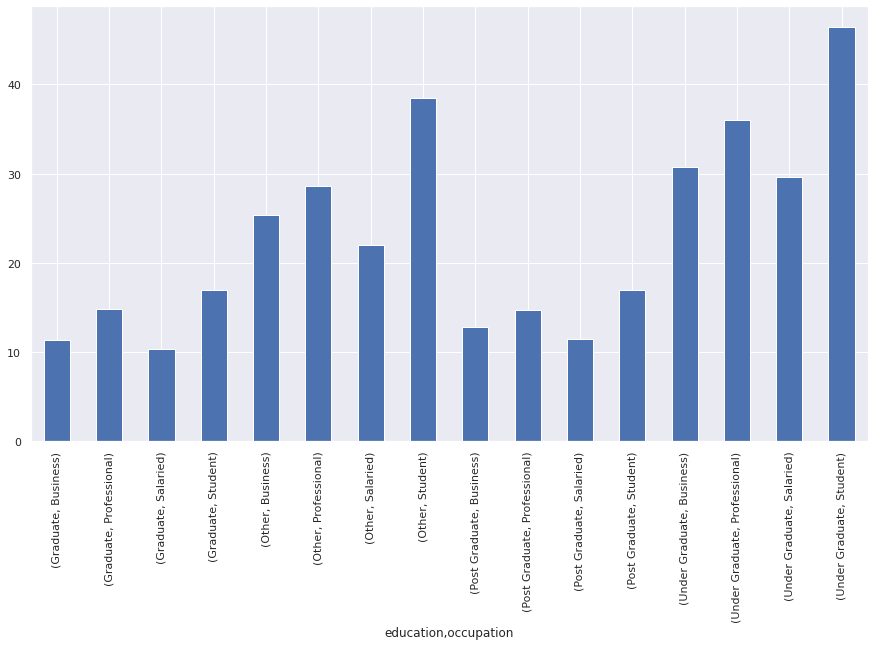

In [44]:
credit_df_default['percentage'].plot(kind='bar',figsize=(15,8))

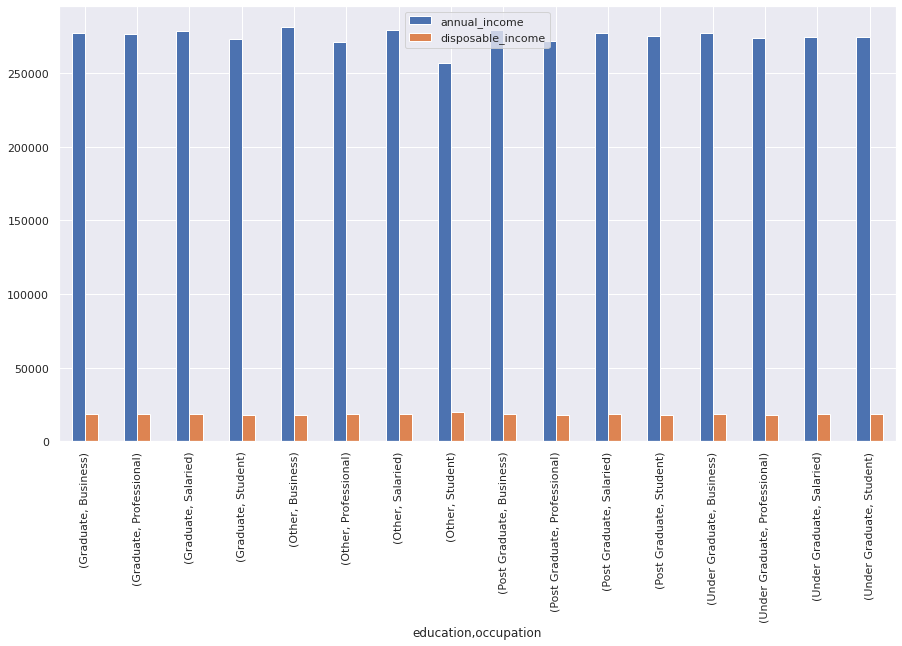

In [21]:
credit_df_default[['annual_income','disposable_income']].plot(kind='bar',figsize=(15,8))

### Attribute wise visulization among defaulters

In [ ]:
credit_df_defaulter = credit_df[credit_df['default']==1]
credit_df_defaulter.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


        default
gender         
Female     1707
Male       6315


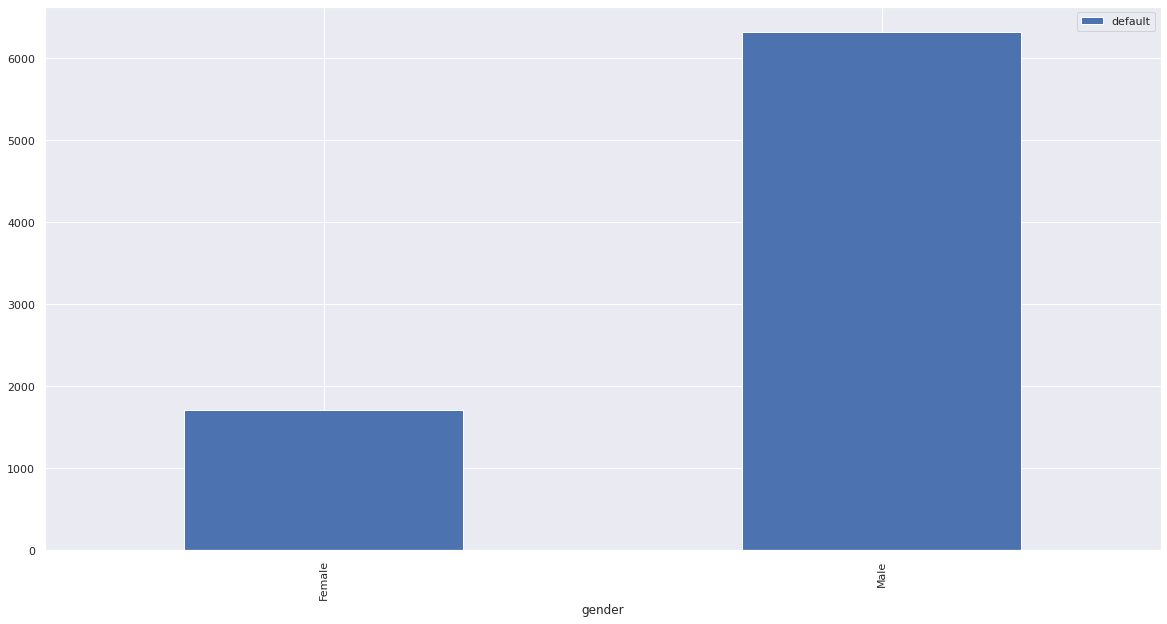

                default
education              
Graduate           2829
Other              1379
Post Graduate      1829
Under Graduate     1985


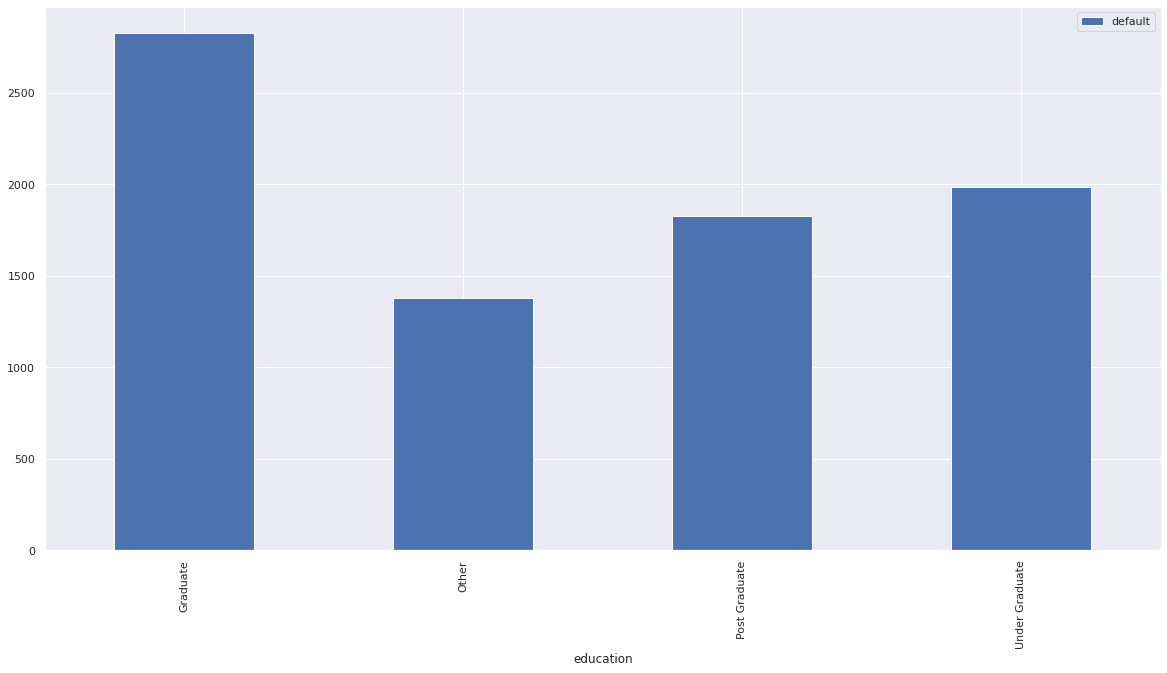

              default
occupation           
Business         1586
Professional     1517
Salaried         4233
Student           686


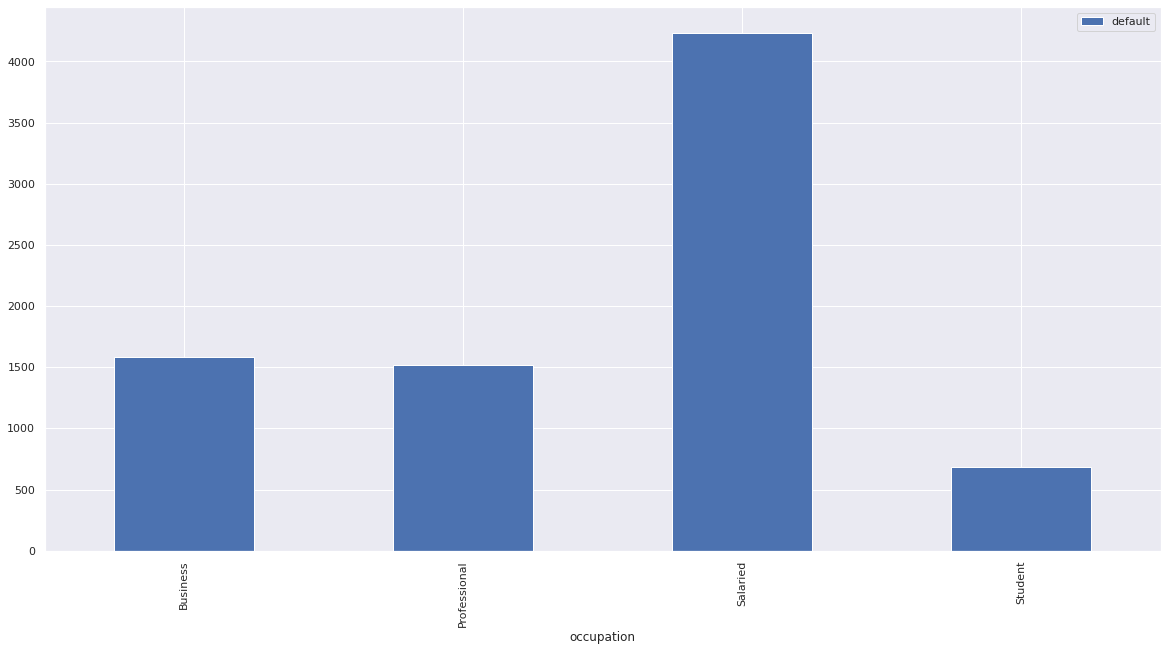

                   default
organization_type         
None                  6031
Tier 1                  81
Tier 2                 370
Tier 3                1540


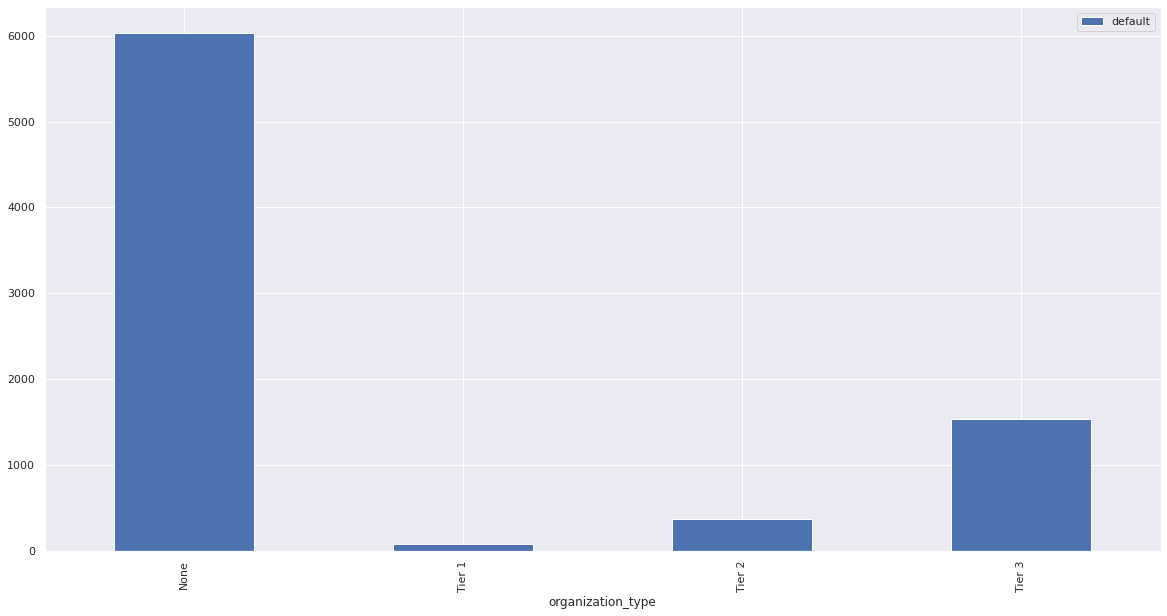

             default
seniority           
Entry           1026
Junior          1609
Mid-level 1     1594
Mid-level 2        2
None            3789
Senior             2


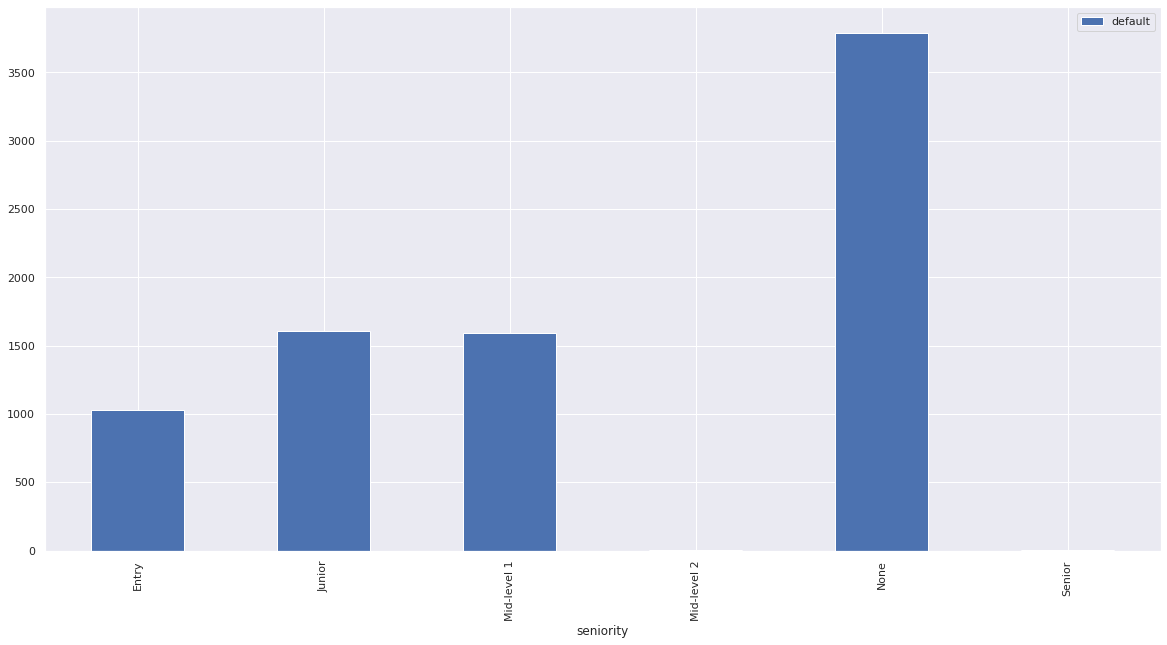

                  default
house_type               
Company provided      216
Family               2517
Owned                 473
Rented               4816


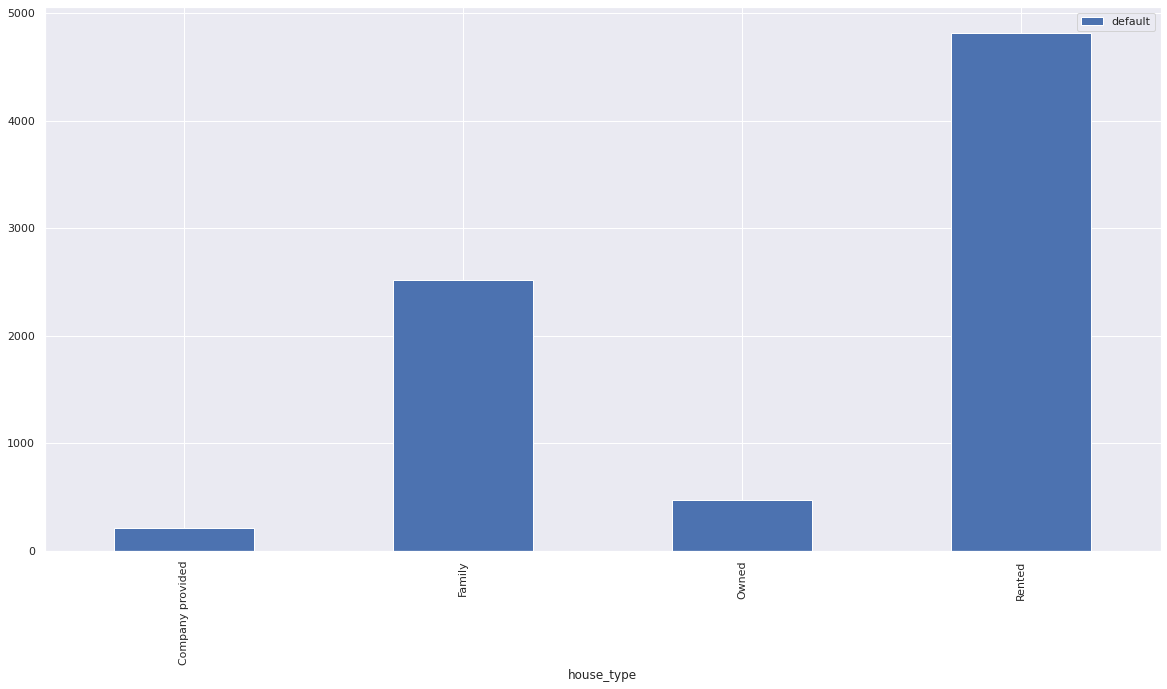

              default
vehicle_type         
Four Wheeler      101
None             5863
Two Wheeler      2058


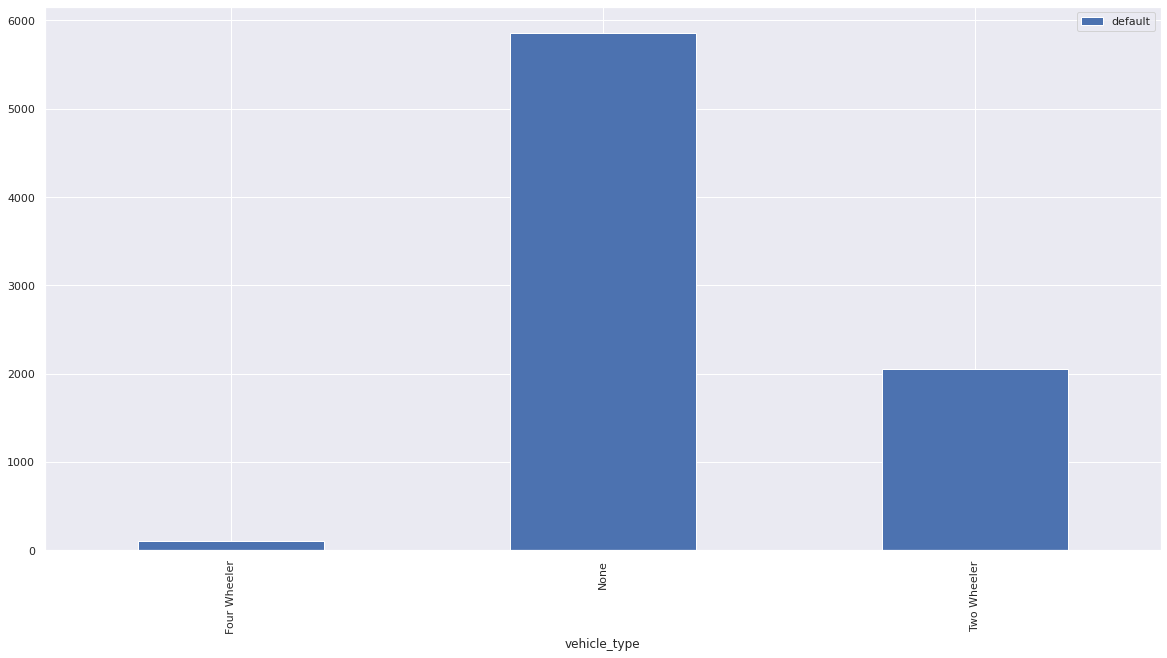

                default
marital_status         
Married            3898
Other               438
Single             3686


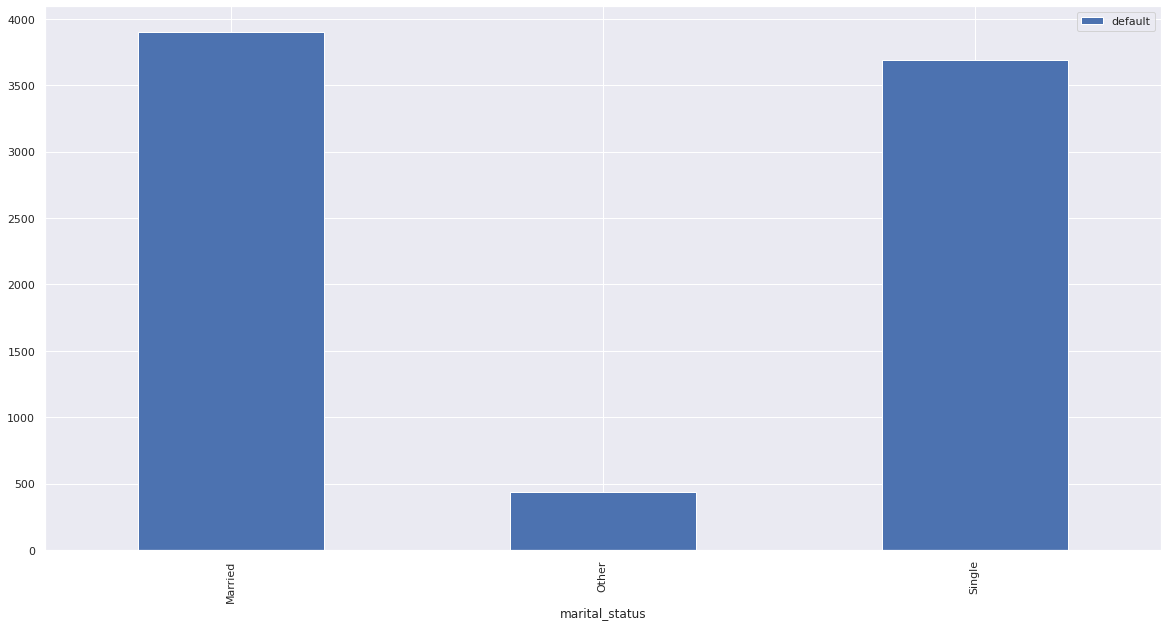

         default
no_card         
0           4222
1           2988
2            812


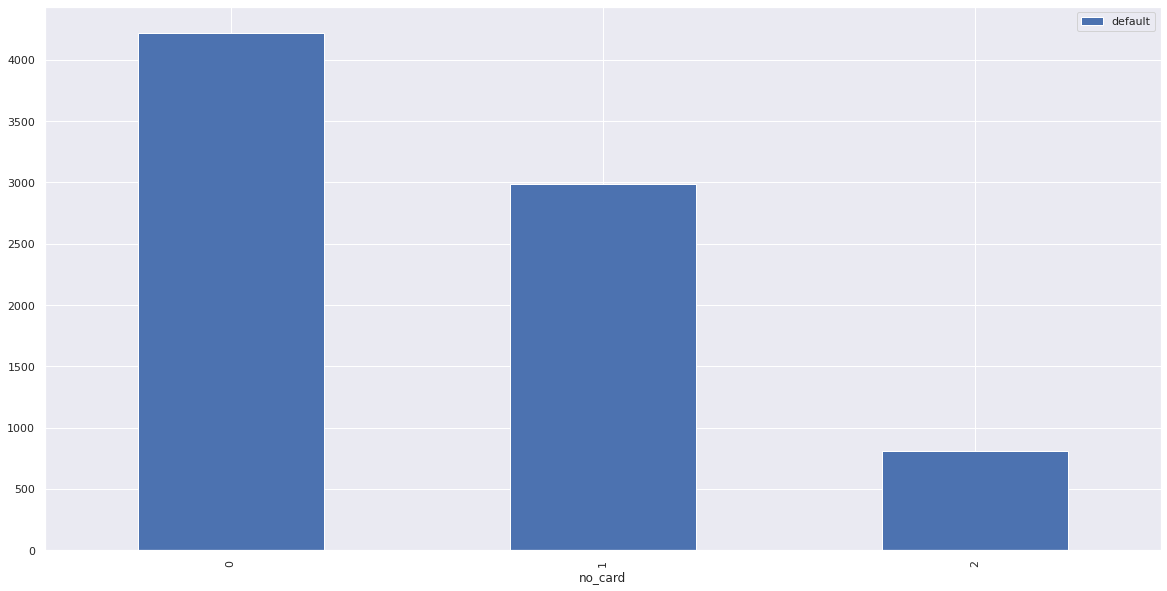

In [ ]:
arr = ['gender', 'education', 'occupation', 'organization_type',
       'seniority', 'house_type', 'vehicle_type', 'marital_status', 'no_card']
for x in arr:
  grouped = credit_df_defaulter[['default',x]].groupby(x).count()
  print(grouped)
  grouped.plot(kind="bar",figsize=(20,10))
  plt.show()

### Checking the null values in the dataset

In [ ]:
credit_df[credit_df.isnull().any(axis=1)]

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default


### Encoding the categorical attributes in the dataset

In [50]:
cleanup_nums = {"gender":{"Male": 0, "Female": 1},
                "education": {"Graduate": 0, "Post Graduate": 1, "Under Graduate": 2, "Other": 3},
                "occupation": {"Salaried":0,"Business":1,"Professional":2,"Student":3},
                "organization_type": {"None":0,"Tier 3":3,"Tier 1":1,"Tier 2":2},
                "seniority":{"None":0,"Mid-level 1":1,"Junior":2,"Entry":3,"Mid-level 2":4,"Senior":5},
                "house_type":{"Rented":0,"Owned":1,"Family":2,"Company provided":3},
                "vehicle_type":{"None":0,"Two Wheeler":1,"Four Wheeler":2},
                "marital_status":{"Married":0,"Single":1,"Other":2}}

In [51]:
credit_df = credit_df.replace(cleanup_nums)
credit_df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,0,0,2,0,0,186319,21625,2,0,0,0,1
1,18,0,2,2,0,0,277022,20442,0,0,0,0,1
2,29,0,2,0,0,3,348676,24404,0,0,0,1,1
3,18,0,0,3,0,0,165041,2533,0,0,0,0,1
4,26,0,1,0,0,1,348745,19321,0,0,0,1,1


### Extracting the values

In [68]:
arr = credit_df.values
X = arr[:,0:12]
Y = arr[:,12]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1234)

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [71]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
from sklearn.metrics import accuracy_score
yHat = model.predict(X_test)
print (round(accuracy_score(y_test, yHat)*100,2))

78.21


In [73]:
model1 = DecisionTreeClassifier(criterion="entropy")

In [74]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
from sklearn.metrics import accuracy_score
yHat = model1.predict(X_test)
print (round(accuracy_score(y_test, yHat)*100,2))

78.48


In [86]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
for crit in ['gini','entropy']:
  print("Decision Tree - {}".format(crit))
  accuracy=[]
  precision=[]
  recall=[]
  for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = Y[train_index],Y[test_index]
    dt = DecisionTreeClassifier(criterion=crit)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
  print("accuracy: ",np.mean(accuracy))
  print("precision: ",np.mean(precision))
  print("recall: ",np.mean(recall))

Decision Tree - gini
accuracy:  0.7811042164150347
precision:  0.326076863562796
recall:  0.3579762101178186
Decision Tree - entropy
accuracy:  0.7844417293133376
precision:  0.3303520791653081
recall:  0.3510646624283711
